In [112]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [113]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
import random
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

Question 1 part (1) & part (2)

In [114]:
column_names = ['family','product-type','steel','carbon','hardness','temper_rolling','condition','formability','strength','non-ageing','surface-finish',
   'surface-quality','enamelability','bc','bf','bt','bw/me','bl','m','chrom','phos','cbond','marvi','exptl','ferro','corr','blue/bright/varn/clean',
   'lustre','jurofm','s','p','shape','thick','width','len','oil','bore','packing','classes']

In [115]:
annealing_df = pd.read_csv('/anneal_data.csv', header = None,names = column_names)

In [116]:
anneal_df = annealing_df.replace('?', np.nan)

In [117]:
anneal_df 

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,C,A,0,50,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,1.001,50.0,0,Y,0,NaN,3
794,NaN,C,NaN,0,0,NaN,S,1,0,NaN,...,NaN,NaN,SHEET,0.699,1300.0,4880,NaN,0,NaN,3
795,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,0.400,609.9,0,NaN,0,NaN,3
796,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,3.200,610.0,4880,NaN,0,NaN,3


In [118]:
print(anneal_df.isna().sum())

family                    687
product-type                0
steel                      70
carbon                      0
hardness                    0
temper_rolling            675
condition                 271
formability               283
strength                    0
non-ageing                703
surface-finish            790
surface-quality           217
enamelability             785
bc                        797
bf                        680
bt                        736
bw/me                     609
bl                        662
m                         798
chrom                     775
phos                      791
cbond                     730
marvi                     798
exptl                     796
ferro                     772
corr                      798
blue/bright/varn/clean    793
lustre                    753
jurofm                    798
s                         798
p                         798
shape                       0
thick                       0
width     

In [119]:
print(anneal_df.describe(include = 'O'))

       family product-type steel temper_rolling condition formability  \
count     111          798   728            123       527         515   
unique      2            1     7              1         2           4   
top        TN            C     A              T         S           2   
freq       60          798   397            123       495         338   

       non-ageing surface-finish surface-quality enamelability  ... phos  \
count          95              8             581            13  ...    7   
unique          1              1               4             2  ...    1   
top             N              P               E             2  ...    P   
freq           95              8             278             8  ...    7   

       cbond exptl ferro blue/bright/varn/clean lustre  shape oil packing  \
count     68     2    26                      5     45    798  58       9   
unique     1     1     1                      3      1      2   2       2   
top        Y     Y    

In [120]:
col_to_drop = ['family','temper_rolling','non-ageing','surface-finish','enamelability','bc','bf','bt','bw/me','bl','m','chrom','phos','cbond','marvi','exptl','ferro','corr','blue/bright/varn/clean',
   'lustre','jurofm','s','p','oil','packing']
anneal_df = anneal_df.drop(col_to_drop,axis = 'columns')

In [121]:
anneal_df

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,classes
0,C,A,8,0,S,NaN,0,G,COIL,0.700,610.0,0,0,3
1,C,R,0,0,S,2,0,E,COIL,3.200,610.0,0,0,3
2,C,R,0,0,S,2,0,E,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,NaN,NaN,0,G,COIL,2.801,385.1,0,0,3
4,C,A,0,60,NaN,NaN,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,NaN,NaN,0,G,COIL,1.001,50.0,0,0,3
794,C,NaN,0,0,S,1,0,G,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,S,2,0,E,COIL,0.400,609.9,0,0,3
796,C,A,0,0,S,2,0,G,SHEET,3.200,610.0,4880,0,3


In [122]:
print(anneal_df.describe())

           carbon    hardness   strength       thick        width  \
count  798.000000  798.000000  798.00000  798.000000   798.000000   
mean     3.547619   11.748120   30.85213    1.181847   781.744361   
std     13.592644   24.621001  115.55127    0.861608   404.722346   
min      0.000000    0.000000    0.00000    0.250000     0.000000   
25%      0.000000    0.000000    0.00000    0.601000   609.900000   
50%      0.000000    0.000000    0.00000    0.800000   610.000000   
75%      0.000000    0.000000    0.00000    1.600000  1250.000000   
max     70.000000   85.000000  700.00000    4.000000  1525.000000   

               len        bore  
count   798.000000  798.000000  
mean   1273.037594   28.195489  
std    1886.768139  124.811534  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%     611.000000    0.000000  
75%     762.000000    0.000000  
max    4880.000000  600.000000  


In [123]:
print(anneal_df.describe(include = 'O'))

       product-type steel condition formability surface-quality  shape classes
count           798   728       527         515             581    798     798
unique            1     7         2           4               4      2       5
top               C     A         S           2               E  SHEET       3
freq            798   397       495         338             278    431     608


In [124]:
anneal_df = anneal_df.replace(0, np.nan)

In [125]:
print(anneal_df.isna().sum())

product-type         0
steel               70
carbon             730
hardness           640
condition          271
formability        283
strength           741
surface-quality    217
shape                0
thick                0
width                1
len                371
bore               759
classes              0
dtype: int64


In [126]:
col_to_drop = ['carbon','hardness','strength','bore','len','condition', 'formability']
anneal_df = anneal_df.drop(col_to_drop,axis = 'columns')
anneal_df = anneal_df.drop('product-type',axis = 'columns')
print(anneal_df)

    steel surface-quality  shape  thick   width classes
0       A               G   COIL  0.700   610.0       3
1       R               E   COIL  3.200   610.0       3
2       R               E  SHEET  0.700  1300.0       3
3       A               G   COIL  2.801   385.1       3
4       A               G  SHEET  0.801   255.0       3
..    ...             ...    ...    ...     ...     ...
793     A               G   COIL  1.001    50.0       3
794   NaN               G  SHEET  0.699  1300.0       3
795     A               E   COIL  0.400   609.9       3
796     A               G  SHEET  3.200   610.0       3
797     R             NaN  SHEET  1.599  1500.0       2

[798 rows x 6 columns]


We also drop Product type because it has only one unique value which is same for all datapoints

In [127]:
print(anneal_df.describe())
print(anneal_df.describe(include = 'O'))

            thick        width
count  798.000000   797.000000
mean     1.181847   782.725220
std      0.861608   404.026297
min      0.250000    20.000000
25%      0.601000   609.900000
50%      0.800000   610.000000
75%      1.600000  1250.000000
max      4.000000  1525.000000
       steel surface-quality  shape classes
count    728             581    798     798
unique     7               4      2       5
top        A               E  SHEET       3
freq     397             278    431     608


In [128]:
anneal_df['surface-quality'] = anneal_df['surface-quality'].fillna(anneal_df['surface-quality'].mode()[0])
anneal_df['steel'] = anneal_df['steel'].fillna(anneal_df['steel'].mode()[0])
anneal_df = anneal_df.dropna(subset = 'width')

In [129]:
print(anneal_df.describe())
print(anneal_df.describe(include = 'O'))

            thick        width
count  797.000000   797.000000
mean     1.179314   782.725220
std      0.859169   404.026297
min      0.250000    20.000000
25%      0.601000   609.900000
50%      0.800000   610.000000
75%      1.600000  1250.000000
max      4.000000  1525.000000
       steel surface-quality  shape classes
count    797             797    797     797
unique     7               4      2       5
top        A               E  SHEET       3
freq     466             495    431     607


In [130]:
anneal_df['classes'] = anneal_df['classes'].replace('U', 6)

<ipython-input-130-fa5eadaa09cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anneal_df['classes'] = anneal_df['classes'].replace('U', 6)


<Axes: xlabel='thick', ylabel='count'>

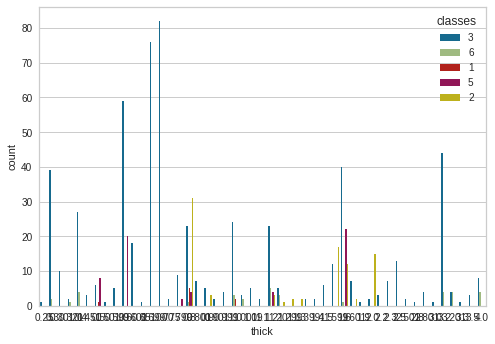

In [131]:
sns.countplot(x='thick',hue = 'classes' ,data=anneal_df)

<Axes: xlabel='width', ylabel='count'>

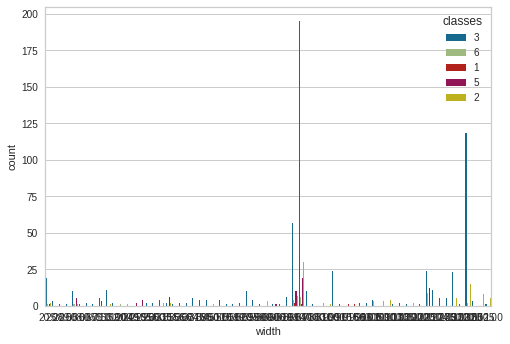

In [132]:
sns.countplot(x='width',hue = 'classes' ,data=anneal_df)

<Axes: xlabel='steel', ylabel='count'>

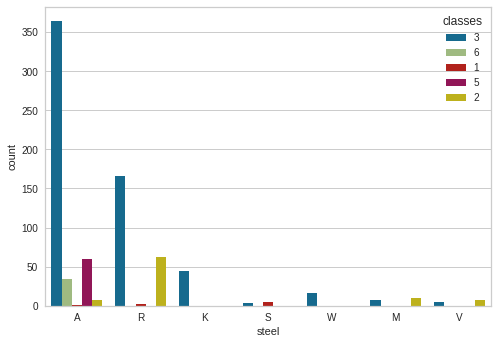

In [133]:
sns.countplot(x='steel',hue = 'classes' ,data=anneal_df)

<Axes: xlabel='surface-quality', ylabel='count'>

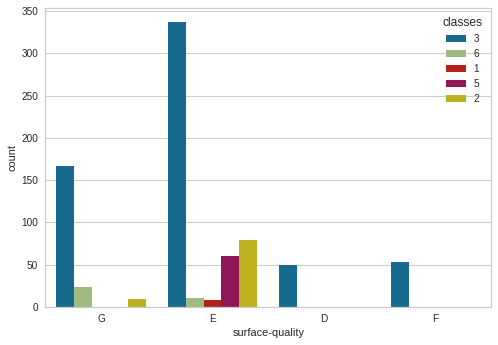

In [134]:
sns.countplot(x='surface-quality',hue = 'classes' ,data=anneal_df)

<Axes: xlabel='shape', ylabel='count'>

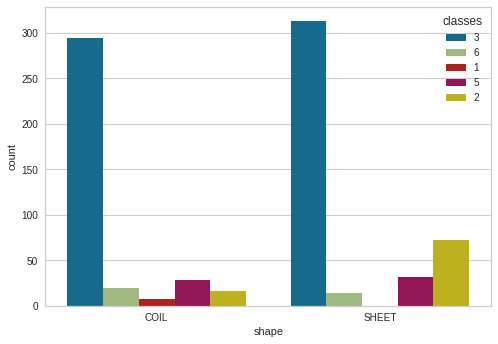

In [135]:
sns.countplot(x='shape',hue = 'classes' ,data=anneal_df)

In [136]:
categorical_features = ['steel','surface-quality','shape']
label_encode = LabelEncoder()
for feature in categorical_features:
  anneal_df[feature] = label_encode.fit_transform(anneal_df[feature]).astype(int)

In [137]:
print(anneal_df)

     steel  surface-quality  shape  thick   width classes
0        0                3      0  0.700   610.0       3
1        3                1      0  3.200   610.0       3
2        3                1      1  0.700  1300.0       3
3        0                3      0  2.801   385.1       3
4        0                3      1  0.801   255.0       3
..     ...              ...    ...    ...     ...     ...
793      0                3      0  1.001    50.0       3
794      0                3      1  0.699  1300.0       3
795      0                1      0  0.400   609.9       3
796      0                3      1  3.200   610.0       3
797      3                1      1  1.599  1500.0       2

[797 rows x 6 columns]


In [138]:
from copy import deepcopy
anneal_df_scaled = deepcopy(anneal_df)

In [139]:
continuous_features = ['width','thick']

In [140]:
scaler = StandardScaler()
anneal_df_scaled[continuous_features] = scaler.fit_transform(anneal_df_scaled[continuous_features])

In [141]:
Y = anneal_df.classes.astype(int)
X = anneal_df.drop(["classes"], axis = 'columns')
user_prompt = 0.35
user_enable = True
x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

In [142]:
Y_sc = anneal_df_scaled.classes.astype(int)
X_sc = anneal_df_scaled.drop(["classes"], axis = 'columns')
user_prompt = 0.35
user_enable = True
x_train_sc,x_test_sc,y_train_sc,y_test_sc = tts(X_sc,Y_sc,test_size=user_prompt,shuffle=user_enable)

Question 1 part (3)

In [143]:
model1 = DTC()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [144]:
y_pred = model1.predict(x_test)
accuracy_dtc = accuracy_score(y_test,y_pred)
print(accuracy_dtc)
k_cv = KFold(n_splits=5, shuffle=False)
accuracy = cross_val_score(model1, X, Y, scoring='accuracy',
                         cv=k_cv)
print(accuracy)

0.8673835125448028
[0.8625     0.9        0.88050314 0.83647799 0.83018868]


In [145]:
model2 = SVC()
model2.fit(x_train,y_train)

SVC()

In [146]:
y_pred = model2.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred)
print(accuracy_svc)
k_cv = KFold(n_splits=5, shuffle=False)
accuracy = cross_val_score(model2, X, Y, scoring='accuracy',
                         cv=k_cv)
print(accuracy)

0.7526881720430108
[0.75       0.76875    0.73584906 0.77987421 0.77358491]


In [147]:
model1 = DTC()
model1.fit(x_train_sc,y_train_sc)

DecisionTreeClassifier()

In [148]:
y_pred = model1.predict(x_test_sc)
accuracy_dtc = accuracy_score(y_test_sc,y_pred)
print(accuracy_dtc)
k_cv = KFold(n_splits=5, shuffle=False)
accuracy = cross_val_score(model1, X_sc, Y_sc, scoring='accuracy',
                         cv=k_cv)
print(accuracy)

0.8387096774193549
[0.8625     0.90625    0.88679245 0.8427673  0.81761006]


In [149]:
model2 = SVC()
model2.fit(x_train_sc,y_train_sc)

SVC()

In [150]:
y_pred = model2.predict(x_test_sc)
accuracy_svc = accuracy_score(y_test_sc,y_pred)
print(accuracy_svc)
k_cv = KFold(n_splits=5, shuffle=False)
accuracy = cross_val_score(model2, X_sc, Y_sc, scoring='accuracy',
                         cv=k_cv)
print(accuracy)

0.7275985663082437
[0.75625    0.775      0.73584906 0.77358491 0.79874214]


Question 1 Part(4)

In [151]:
def covariance_matrix(df):
  means = np.mean(df, axis=0)
  adjust = df - means
  cov_matrix = np.dot(adjust.T, adjust) / (df.shape[0] - 1)
  return cov_matrix
print(covariance_matrix(X_sc))

[[ 2.61519013 -0.21112463  0.0719627   0.27791942  0.19493444]
 [-0.21112463  0.87593236 -0.07016576  0.02504459 -0.05809842]
 [ 0.0719627  -0.07016576  0.24864914 -0.08221462  0.09021142]
 [ 0.27791942  0.02504459 -0.08221462  1.00125628  0.03256335]
 [ 0.19493444 -0.05809842  0.09021142  0.03256335  1.00125628]]


In [152]:
def principal_component_analysis(X,n_feat):
  for column in X:  
    X[column] = (X[column] - X[column].mean()) / X[column].std()
  def covariance_matrix(df):
    means = np.mean(df, axis=0)
    adjust = df - means
    cov_matrix = np.dot(adjust.T, adjust) / (df.shape[0] - 1)
    return cov_matrix
  cov_matrix = covariance_matrix(X)
  eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
  idx = np.argsort(eig_vals)[::-1]
  eig_vals = eig_vals[idx]
  sum_or = eig_vals.sum()
  eig_vecs = eig_vecs[:,idx]
  components = eig_vecs[:,:n_feat]
  sum_fin = eig_vals[:n_feat].sum()
  transformed = np.dot(X, components)
  cum_var = sum_fin/sum_or
  return transformed,components,cum_var

Question 1 Part(5)

<function matplotlib.pyplot.show(close=None, block=None)>

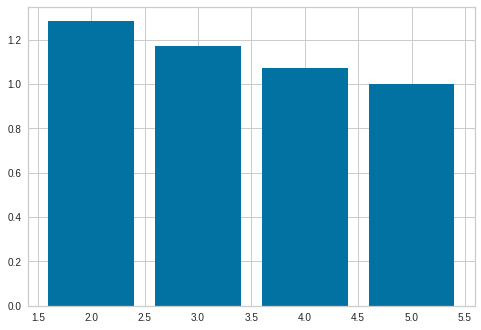

In [156]:
arr = []
for i in range(2,6): 
  X_trans,eig,cum_v = principal_component_analysis(X_sc,i)
  arr.append(X_trans.var())
i = np.linspace(2,5,4)
plt.bar(i,arr)
plt.show

[[ 0.46199282 -0.4954422 ]
 [-0.4808612  -0.03790424]
 [ 0.55539952  0.39535403]
 [-0.0238226  -0.7705684 ]
 [ 0.4962852  -0.05495292]]


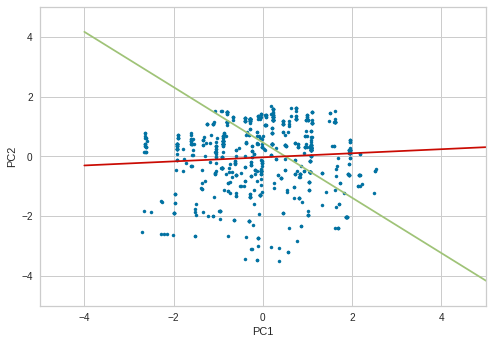

In [157]:
X_trans,eig,cum_v = principal_component_analysis(X_sc,2)
print(eig)
def x_lin(m):
  y2 = m*np.arange(-4,5)
  return y2
plt.plot(X_trans[:,0], X_trans[:,1],'.')
for j in range(2):
  slope_1 = eig[1,j]/eig[0,j]
  a = x_lin(slope_1)
  k = np.linspace(-4,5,9)
  plt.plot(k,a)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Question 1 Part (6)

In [158]:
X_trans,eig,cum_v = principal_component_analysis(X_sc,4)
user_prompt = 0.35
user_enable = True
x_train_trans,x_test_trans,y_train_trans,y_test_trans = tts(X_trans,Y_sc,test_size=user_prompt,shuffle=user_enable)

In [159]:
model1 = DTC()
model1.fit(x_train_trans,y_train_trans)

DecisionTreeClassifier()

In [160]:
y_pred = model1.predict(x_test_trans)
accuracy_dtc = accuracy_score(y_test_trans,y_pred)
print(accuracy_dtc)
k_cv = KFold(n_splits=5, shuffle=False)
accuracy = cross_val_score(model1, X_trans,Y_sc, scoring='accuracy',cv=k_cv)
print(accuracy)

0.8315412186379928
[0.81875    0.9        0.83018868 0.8490566  0.79245283]


In [161]:
model2 = SVC()
model2.fit(x_train_trans,y_train_trans)

SVC()

In [162]:
y_pred = model2.predict(x_test_trans)
accuracy_svc = accuracy_score(y_test_trans,y_pred)
print(accuracy_svc)
k_cv = KFold(n_splits=5, shuffle=False)
accuracy = cross_val_score(model2, X_trans,Y_sc, scoring='accuracy',cv=k_cv)
print(accuracy)

0.7634408602150538
[0.75625    0.78125    0.76100629 0.77987421 0.79245283]


Question 1 PArt(7)

best value of n_features for PCA is: 5


<function matplotlib.pyplot.show(close=None, block=None)>

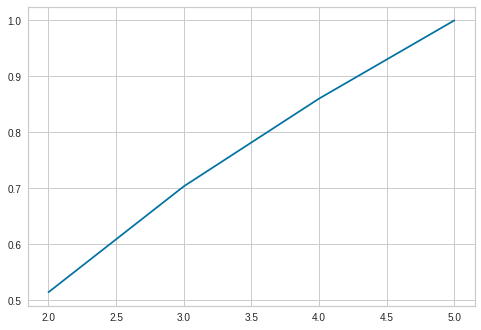

In [163]:
arr = []
for i in range(2,6): 
  X_trans,eig,cum_v = principal_component_analysis(X_sc,i)
  arr.append(cum_v)
i = np.linspace(2,5,4)
m = arr.index(max(arr))+2
print('best value of n_features for PCA is:',m)
plt.plot(i,arr)
plt.show